In [1]:
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, array_to_latex,plot_histogram
from math import pi

In [2]:
circuit = QuantumCircuit(1)
circuit.y(0)
circuit.draw()


┌───┐
q: ┤ Y ├
   └───┘

In [3]:
qr = QuantumRegister(1) # quantum register with 1 qubit
cr = ClassicalRegister(1) # classical register with 1 classical bit (we need it store measurement results)
circuit = QuantumCircuit(qr, cr) #Creates a new quantum circuit with the specified quantum register (qr) for qubits and classical register (cr) for measurement results 
circuit.y(0) #To use pauli-x or NOT gate in this quibit, we call x method on circuit, and pass the parameter 0, which corresponds to the index of our first  quibit (in this case we have only one quibit) 
circuit.measure(qr, cr) ## Measure all qubits in qr and store results in cr
print(circuit)

      ┌───┐┌─┐
  q0: ┤ Y ├┤M├
      └───┘└╥┘
c0: 1/══════╩═
            0 


Measurement results: {'1': 1024}


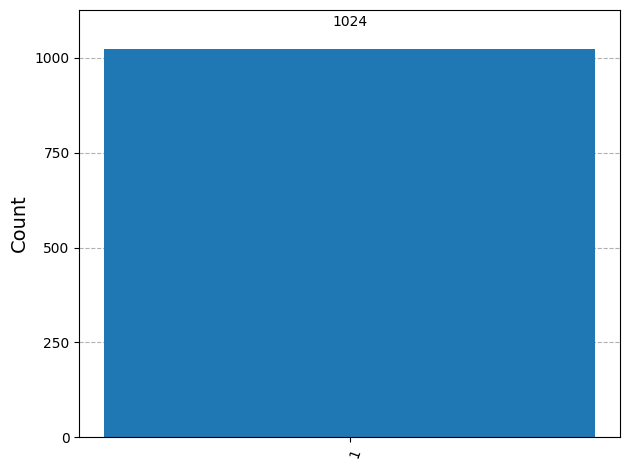

In [4]:
from qiskit.providers.basic_provider import BasicProvider
simulator = BasicProvider().get_backend('basic_simulator') ## Create a basic quantum simulator
compiled_circuit = transpile(circuit, simulator) ## Transpile the circuit for the simulator
result = simulator.run(compiled_circuit, shots=1024).result() #Run the circuit multiple times (shots), Each shot represents one execution of the circuit 
# Print the raw measurement counts
print("Measurement results:", result.get_counts())
# Plot the histogram of measurement outcomes

plot_histogram(result.get_counts())

Statevector([0.+0.j, 0.+1.j],
            dims=(2,))


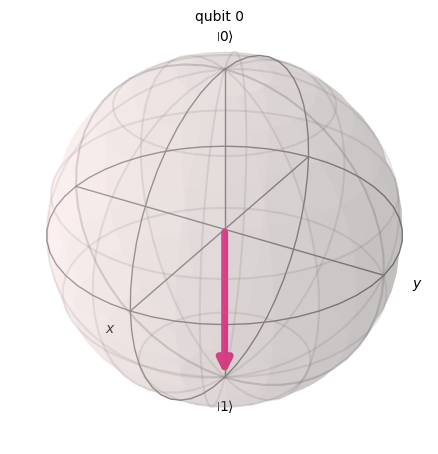

In [5]:
circuit.remove_final_measurements()  # no measurements allowed
from qiskit.quantum_info import Statevector
statevector = Statevector(circuit)
print(statevector)
plot_bloch_multivector(statevector.data)

In [6]:
circuit = QuantumCircuit(2)
circuit.draw()
circuit.ry(pi/4, 0) # Rotate qubit 0 by angle theta around the Y-axis
circuit.ry(pi/4, 1) # Rotate qubit 1 by angle theta around the Y-axis
circuit.y(1) # Apply pauli Y gate to our circuit  applying inly it to the second qubit
circuit.draw()

┌─────────┐     
q_0: ┤ Ry(π/4) ├─────
     ├─────────┤┌───┐
q_1: ┤ Ry(π/4) ├┤ Y ├
     └─────────┘└───┘

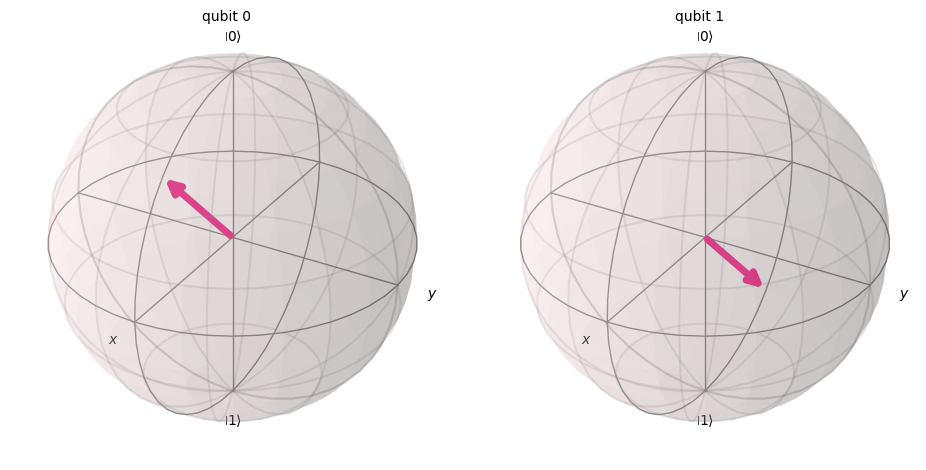

In [7]:
# !pip install sympy

circuit.remove_final_measurements()  # no measurements allowed
from qiskit.quantum_info import Statevector
statevector = Statevector(circuit)
# Print the statevector as a NumPy array
# print("Statevector =", statevector.data)
plot_bloch_multivector(statevector)